#### Bootstrapping Code Demonstration

#### **RECAP**

##### Bootstrapping 
A statistical method that uses the observed data to simulate resamplings from the population, which we calculate a statistic each time, and use the dstribution of the simulated statistic to approximate characteritics of the population.


##### Bootstrapping Process
1. treat the sample as the “population”;

2. take repeated samples **with replacement** and record the estimate;

3. repeat the above process for a large number of iterations;

4. form a data distribution;

5. do the inference work from the above empirical data distribution.

##### Why Bootstrapp
a. make no assumption about population distribution <br>
b. can estimate properties of any given statistics <br>
c. easy to construct the 95% CI from the resampling distribution

#### Code Demo: Use bootstrap to estimate population parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Step 1: Population Distribution

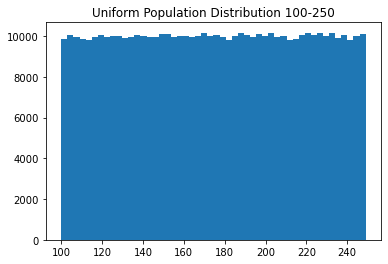

In [2]:
np.random.seed(123)  # to set seed for consistency
# simulated population distribution
weight_pop = np.random.randint(100, 250, size=500000)
plt.hist(weight_pop, bins=50)
plt.title('Uniform Population Distribution 100-250')
plt.show()

In [3]:
print(np.mean(weight_pop), np.std(weight_pop))  # population mean

174.608488 43.26725993582048


step 2: take a random sample from the population

In [4]:
weight_sample = np.random.choice(weight_pop, size=50)
sample_mean = np.mean(weight_sample)  # sample mean
sample_std = np.std(weight_sample)  # sample std
sample_mean, sample_std

(166.0, 36.837480912787726)

step 3: bootstrap for 10,000 times


In [5]:
boot_means = []
k = 10000
for _ in range(k):
    # take a random sample each iteration with replacement
    boot_sample = np.random.choice(weight_sample, replace=True, size=50)
    boot_mean = np.mean(boot_sample)  # calculate the mean for each iteration
    boot_means.append(boot_mean)  # append the mean to boot_means
# transform it into a numpy array for calculation
boot_means_np = np.array(boot_means)
boot_means_np[:10]

array([164.26, 156.02, 165.06, 174.46, 161.08, 170.44, 164.96, 163.98,
       175.04, 159.28])

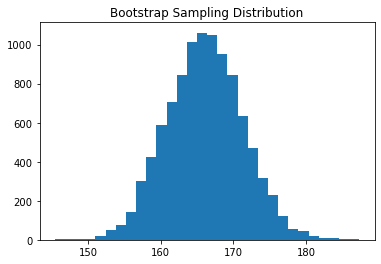

In [6]:
plt.hist(boot_means_np, bins=30)
plt.title('Bootstrap Sampling Distribution')
plt.show()

step 4: analysis and interpretation


In [7]:
boot_means = np.mean(boot_means_np)  # bootstrapped sample means
print('bootstrap mean is', boot_means,
      '| bootstrap std is', np.std(boot_means_np))
print('sample mean is', sample_mean)
print('original population mean is', np.mean(weight_pop))

bootstrap mean is 166.05041 | bootstrap std is 5.211882822157459
sample mean is 166.0
original population mean is 174.608488


In [8]:
np.percentile(boot_means_np, [2.5, 97.5])  # 95% C.I.

array([156.18 , 176.201])

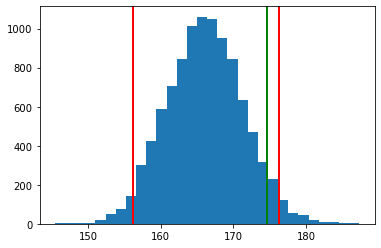

In [9]:
plt.hist(boot_means_np, bins=30, alpha=1)
plt.axvline(np.percentile(boot_means_np, 2.5), color='red', linewidth=2)
plt.axvline(np.percentile(boot_means_np, 97.5), color='red', linewidth=2)
plt.axvline(np.mean(weight_pop), color='green', linewidth=2)

plt.show()

In 95% of the time, the true population mean lies between 156 and 176.

#### What if we have parameters which standard error cannot be easily calculated? 


In [10]:
sample_median = np.median(weight_sample)  # sample mean
sample_median

160.5

In [11]:
boot_medians = []
k = 10000
for _ in range(k):
    # take a random sample each iteration
    boot_sample = np.random.choice(weight_sample, replace=True, size=50)
    # calculate the mean for each iteration
    boot_median = np.median(boot_sample)
    boot_medians.append(boot_median)  # append the mean to boot_means
# transform it into a numpy array for calculation
boot_medians_np = np.array(boot_medians)
boot_medians_np[:10]

array([168. , 168. , 154. , 159. , 154. , 148.5, 175. , 153. , 162. ,
       169. ])

In [12]:
print('bootstrap median is', np.median(boot_medians_np))
print('population median is', np.median(boot_medians_np))

np.percentile(boot_medians_np, [2.5, 97.5])  # 95% C.I.

bootstrap median is 160.5
population median is 160.5


array([149., 177.])

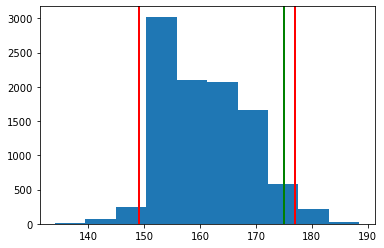

In [13]:
plt.hist(boot_medians_np, bins=10, alpha=1)
plt.axvline(np.percentile(boot_medians_np, 2.5), color='red', linewidth=2)
plt.axvline(np.percentile(boot_medians_np, 97.5), color='red', linewidth=2)
plt.axvline(np.median(weight_pop), color='green', linewidth=2)

plt.show()

### Taking spotify data for example

In [14]:
# dummy variables

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Step1: To get population data

In [15]:
spotify_population = pd.read_csv('songs_normalize.csv')
spotify_population.sample(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
93,The Corrs,Breathless,207506,False,2000,68,0.607,0.820,11,-7.754,1,0.0597,0.0541,0.000068,0.269,0.768,126.988,"pop, Folk/Acoustic"
1373,Bastille,Pompeii,214147,False,2013,74,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.271,0.571,127.435,"pop, rock"
1096,Matt Cardle,When We Collide,226000,False,2011,46,0.443,0.683,2,-5.521,1,0.0343,0.0198,0.000005,0.313,0.447,81.986,pop
862,The Ting Tings,Shut Up and Let Me Go,171226,False,2007,55,0.852,0.927,7,-4.497,1,0.0581,0.0109,0.002680,0.054,0.887,107.993,"pop, rock, Dance/Electronic"
1363,Drake,Started From the Bottom,174120,True,2013,65,0.794,0.523,8,-7.829,1,0.1610,0.0331,0.000000,0.156,0.560,86.307,"hip hop, pop, R&B"


### Step2: To get sampling data

In [16]:
# Extract 500 random samples from population
spotify_sample = spotify_population.sample(n=500, random_state=1)

### Step3: Bootstrap for 2000 times.

In [17]:
# Replicate this 2000 times
mean_popularity_2000 = []
k = 2000
for i in range(k):
    mean_popularity_2000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['popularity'])
        # A random 100% sample of the DataFrame with replacement:
    )

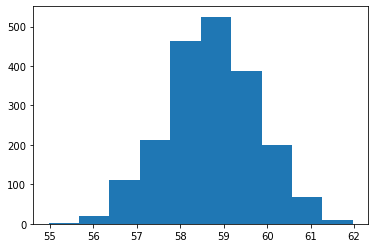

In [18]:
# Draw a histogram of the resample means
plt.hist(mean_popularity_2000)
plt.show()

#### Comparing sampling and bootstrap distributions

- sampling distribution
- Generate a sampling distribution of 2000 replicates.
- Sample 500 rows of the population without replacement and calculate the mean popularity.

In [19]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
        # Sample 500 rows and calculate the mean popularity
        spotify_population.sample(n=500)['popularity'].mean()
    )

- bootstrap distribution
- Generate a bootstrap distribution of 2000 replicates.
- Sample 500 rows of the sample with replacement and calculate the mean popularity.

In [20]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 1000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
        # Resample 500 rows and calculate the mean popularity
        spotify_sample.sample(n=500, replace=True)['popularity'].mean()
    )

### Compare sampling and bootstrap means

In [21]:
sampling_distribution = mean_popularity_2000_samp
bootstrap_distribution = mean_popularity_2000_boot

In [22]:
# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print(f'population mean is {pop_mean}, sample mean is {samp_mean}')
print(
    f'sample dist. mean is {samp_distn_mean}, bootstrap dist. mean is {boot_distn_mean}')

population mean is 59.8725, sample mean is 58.748
sample dist. mean is 59.87877400000001, bootstrap dist. mean is 58.783049


- The sampling distribution mean is the best estimate of the true population mean; 
- the bootstrap distribution mean is closest to the original sample mean.

#### Calculating confidence intervals

In [23]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(56.8357, 60.7562)


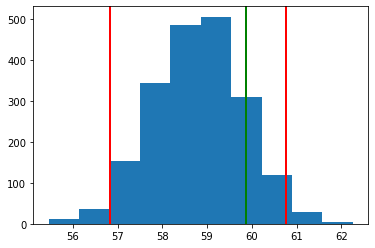

In [24]:
plt.hist(bootstrap_distribution, bins=10, alpha=1)
plt.axvline(np.percentile(bootstrap_distribution, 2.5), color='red', linewidth=2)
plt.axvline(np.percentile(bootstrap_distribution, 97.5), color='red', linewidth=2)
plt.axvline(np.mean(spotify_population['popularity']), color='green', linewidth=2)

plt.show()